# <h1 style='color: darkblue; font-size: 30px;'>Data Science - Churn Prediction Project</h1>

<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid darkblue;'>

# <font color='darkblue' style='font-size: 10;'>The project</font>

### <font color='darkblue' style='font-size: 20;'>Description:</font>

The project aims to use Machine Learning algorithms to create a model capable of predicting the Churn of a telecom company. Three different models were developed to accomplish this task: the KNN, the Bernoulli Naive Bayes, and the Decision Trees.

The dataset used was based on: https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets?select=churn-bigml-20.csv

<hr style = 'border: 1px solid darkblue;'>

# <font color='darkblue' style='font-size: 20;'>About the dataset</font>

### <font color='darkblue' style='font-size: 20;'>Data</font>

The dataset consists of 7043 data points stored as rows with 18 columns

The dataset has the target column "Churn" and the other columns describe the customer's personal information, such as whether he is over 65 or not, if he has dependents, and if he is married.

<hr style = 'border: 1px solid darkblue;'>

# <font color='darkblue' style='font-size: 20;'>Preparation</font>
<hr style = 'border: 1px solid darkblue;'>

### <font color='darkblue' style='font-size: 20;'>Importing the required libraries</font>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### <font color='darkblue' style='font-size: 20;'>Reading the dataset</font>

In [11]:
df = pd.read_csv('Dados\\Customer-Churn.csv')

### <font color='darkblue' style='font-size: 20;'>Visualizating the dataset</font> 

In [12]:
df.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


### <font color='darkblue' style='font-size: 20;'>Verifying the size of the dataset</font> 

In [13]:
df.shape

(7043, 18)

### <font color='darkblue' style='font-size: 20;'>Analyzing descriptive statistics</font> 

In [14]:
df.describe()

,Maior65Anos,MesesDeContrato,ContaMensal
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### <font color='darkblue' style='font-size: 20;'>Checking if that there are no non-null values in the data</font> 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Maior65Anos              7043 non-null   int64  
 1   Conjuge                  7043 non-null   object 
 2   Dependentes              7043 non-null   object 
 3   MesesDeContrato          7043 non-null   int64  
 4   TelefoneFixo             7043 non-null   object 
 5   VariasLinhasTelefonicas  7043 non-null   object 
 6   ServicoDeInternet        7043 non-null   object 
 7   SegurancaOnline          7043 non-null   object 
 8   BackupOnline             7043 non-null   object 
 9   SeguroNoDispositivo      7043 non-null   object 
 10  SuporteTecnico           7043 non-null   object 
 11  TVaCabo                  7043 non-null   object 
 12  StreamingDeFilmes        7043 non-null   object 
 13  TipoDeContrato           7043 non-null   object 
 14  PagamentoOnline         

In [16]:
df.isnull().sum()

Maior65Anos                0
Conjuge                    0
Dependentes                0
MesesDeContrato            0
TelefoneFixo               0
VariasLinhasTelefonicas    0
ServicoDeInternet          0
SegurancaOnline            0
BackupOnline               0
SeguroNoDispositivo        0
SuporteTecnico             0
TVaCabo                    0
StreamingDeFilmes          0
TipoDeContrato             0
PagamentoOnline            0
FormaDePagamento           0
ContaMensal                0
Churn                      0
dtype: int64

No null value or NA 

### <font color='darkblue' style='font-size: 20;'> Variable transformation</font> 

In [17]:
traducao_dic = {'Sim' : 1, 'Nao': 0}
                
dadosmodificados = df[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)

In [18]:
#Transformation by get dummies
dummies = pd.get_dummies(df.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis=1))

#Concat of transformed data with the dataset
df = pd.concat([dadosmodificados, dummies], axis=1)

In [20]:
df.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0


# <font color='darkblue' style='font-size: 20;'>Processing</font>
<hr style = 'border: 1px solid darkblue;'>

### <font color='darkblue' style='font-size: 20;'>Exploratory Data Analysis</font> 

0    5174
1    1869
Name: Churn, dtype: int64

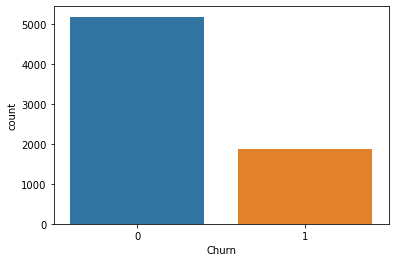

In [21]:
ax = sns.countplot(x='Churn', data=df)

df['Churn'].value_counts()

**It might be necessary to rebalance the data**

### <font color='darkblue' style='font-size: 20;'>Data Balancing</font> 

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
#Data division
X = df.drop('Churn', axis=1)
y = df['Churn']

In [27]:
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)

In [28]:
#merging the balanced data
df = pd.concat([X, y], axis=1)

In [29]:
df.shape

(10348, 39)

0    5174
1    5174
Name: Churn, dtype: int64

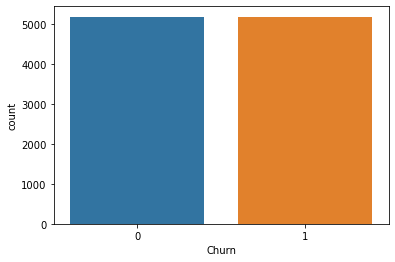

In [30]:
#Second Verification - balance
ax = sns.countplot(x='Churn', data=df)
df['Churn'].value_counts()

# <font color='darkblue' style='font-size: 20;'>Building the model</font>
<hr style = 'border: 1px solid darkblue;'>

### <font color='darkblue' style='font-size: 20;'>KNN</font> 

In [31]:
from sklearn.preprocessing import StandardScaler as SC

In [32]:
#Setting the value for dependent and independent variables
X = df.drop('Churn', axis=1)
y = df['Churn']

In [34]:
#Scale the data
norm = SC()

X_norm = norm.fit_transform(X)
X_norm

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.30373042,
        -0.47943196, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76702973,
         2.08580171, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76702973,
         2.08580171, -0.4360152 ],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30373042,
        -0.47943196, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76702973,
        -0.47943196, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76702973,
        -0.47943196, -0.4360152 ]])

In [35]:
from sklearn.model_selection import train_test_split

In [66]:
#Splitting the dataset
SEED = 123
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, y, test_size=0.25, random_state=SEED)

In [89]:
from sklearn.neighbors import KNeighborsClassifier

#Create and fit the KNN model
classifier = KNeighborsClassifier(metric='euclidean')
classifier.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean')

In [68]:
#Prediction of test set
Y_pred_knn = classifier.predict(X_test)

In [69]:
from sklearn import metrics

In [70]:
#Metrics
print("Accuracy:",round(metrics.accuracy_score(Y_test, Y_pred_knn),4))
print("Precision:",round(metrics.precision_score(Y_test, Y_pred_knn),4))
print("Recall:",round(metrics.recall_score(Y_test, Y_pred_knn),4))
print("F1:",round(metrics.f1_score(Y_test, Y_pred_knn),4))

Accuracy: 0.8106
Precision: 0.7939
Recall: 0.8278
F1: 0.8105


#### <font color='darkblue' style='font-size: 20;'>Confusion Matrix - LR Model</font> 

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay

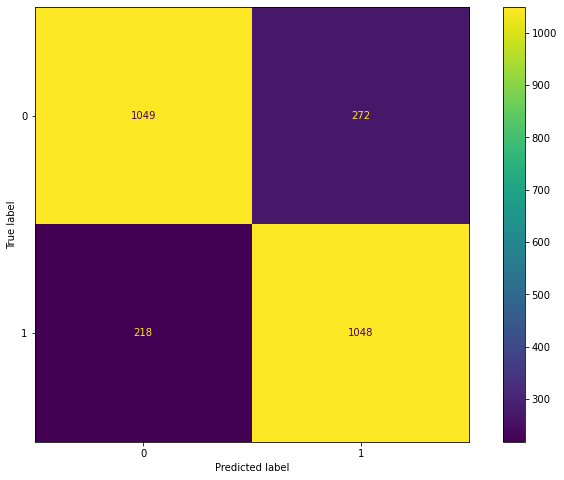

In [72]:
cm = confusion_matrix(Y_test, Y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#### <font color='darkblue' style='font-size: 20;'>Curva ROC - LR Model</font> 

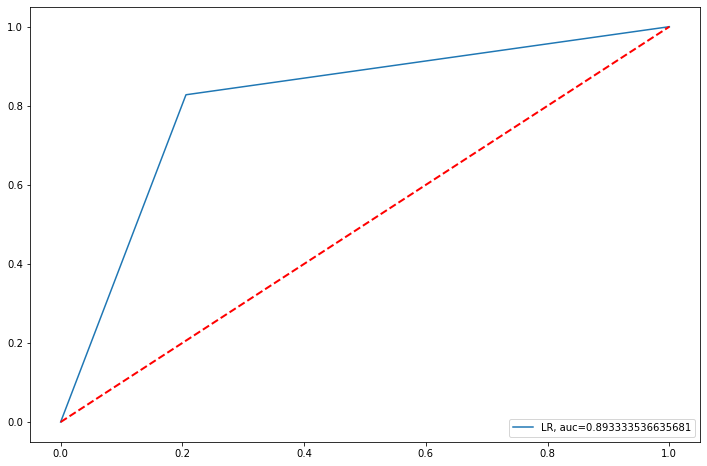

In [73]:
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred_knn)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

plt.rcParams['figure.figsize']=(12.,8.)
plt.plot(fpr, tpr, label="LR, auc="+str(auc))
plt.plot([0,1], [0,1], color='r', lw=2, linestyle='--')
plt.legend(loc=4)

<hr style = 'border: 1px solid darkblue;'>

### <font color='darkblue' style='font-size: 20;'>Decision Tree</font> 

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
#Creating the Decision Tree model
dt = DecisionTreeClassifier(criterion='entropy', max_depth = 5, random_state=SEED)

In [76]:
#Fitting the Logistic Regression model and making predictions of test set
dtc = dt.fit(X_train, y_train)
Y_pred_dtc = dt.predict(X_test)

In [77]:
#Metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_dtc).round(4))
print("Precision:",metrics.precision_score(Y_test, Y_pred_dtc).round(4))
print("Recall:",metrics.recall_score(Y_test, Y_pred_dtc).round(4)) 
print("F1:",metrics.f1_score(Y_test, Y_pred_dtc).round(4))

Acurácia: 0.8002
Precisão: 0.787
Recall: 0.8112
F1: 0.7989


#### <font color='darkblue' style='font-size: 20;'>Confusion Matrix - DT Model</font> 

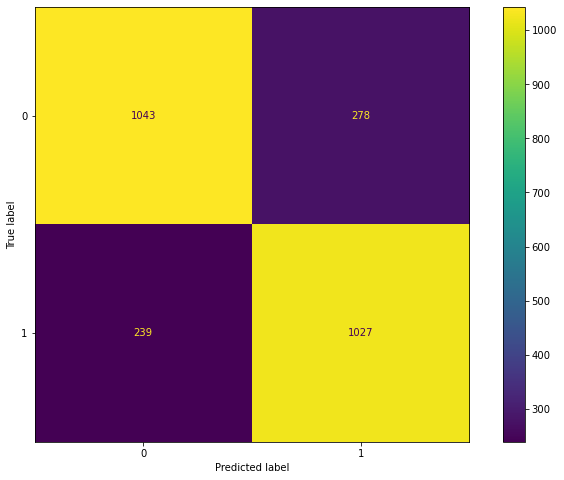

In [78]:
cm = confusion_matrix(Y_test, Y_pred_dtc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#### <font color='darkblue' style='font-size: 20;'>Curva ROC - DT Model</font> 

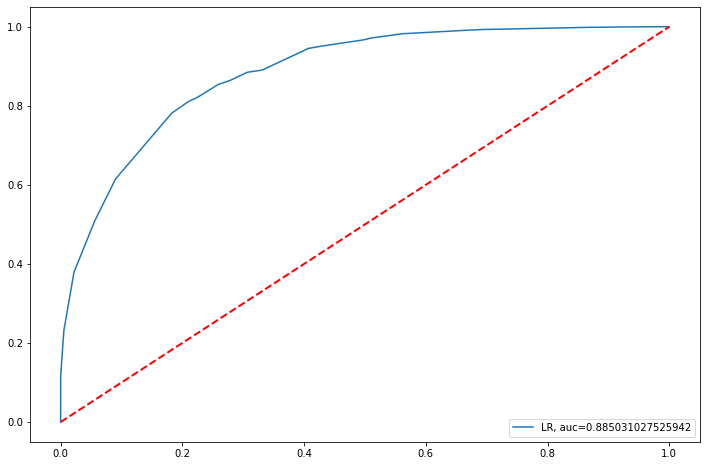

In [79]:
y_pred_proba = dtc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

plt.rcParams['figure.figsize']=(12.,8.)
plt.plot(fpr, tpr, label="LR, auc="+str(auc))
plt.plot([0,1], [0,1], color='r', lw=2, linestyle='--')
plt.legend(loc=4)

<hr style = 'border: 1px solid darkblue;'>

### <font color='darkblue' style='font-size: 20;'>Naive Bayes</font> 

In [80]:
from sklearn.naive_bayes import BernoulliNB as BNB

In [81]:
# the median was chosen because it is the central value of the data
median_x_train = np.median(X_train)
median_x_train

-0.4461759755508453

In [82]:
#Creating the Naive Bayes model
bnb = BNB(binarize = median_x_train)

In [84]:
#Fitting the Random Forest model and making predictions of test set 
bnb.fit(X_train, Y_train)
Y_pred_bnb = bnb.predict(X_test)

In [85]:
#Metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_bnb).round(4))
print("Precision:",metrics.precision_score(Y_test, Y_pred_bnb).round(4))
print("Recall:",metrics.recall_score(Y_test, Y_pred_bnb).round(4)) 
print("F1:",metrics.f1_score(Y_test, Y_pred_bnb).round(4))

Accuracy: 0.7534
Precision: 0.7093
Recall: 0.8404
F1: 0.7693


#### <font color='darkblue' style='font-size: 20;'>Confusion Matrix - RF Model</font> 

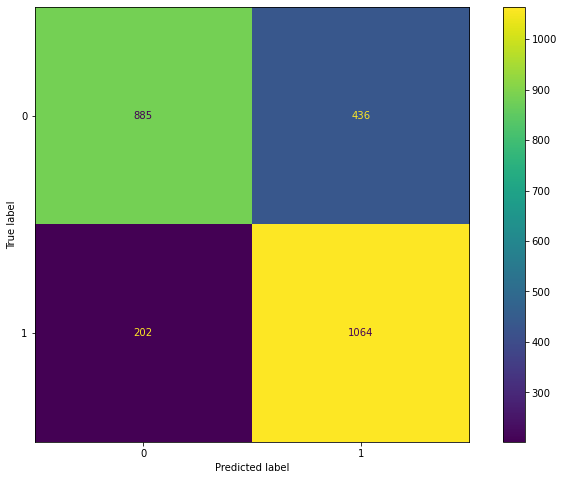

In [86]:
cm = confusion_matrix(Y_test, Y_pred_bnb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#### <font color='darkblue' style='font-size: 20;'>Curva ROC - RF Model</font> 

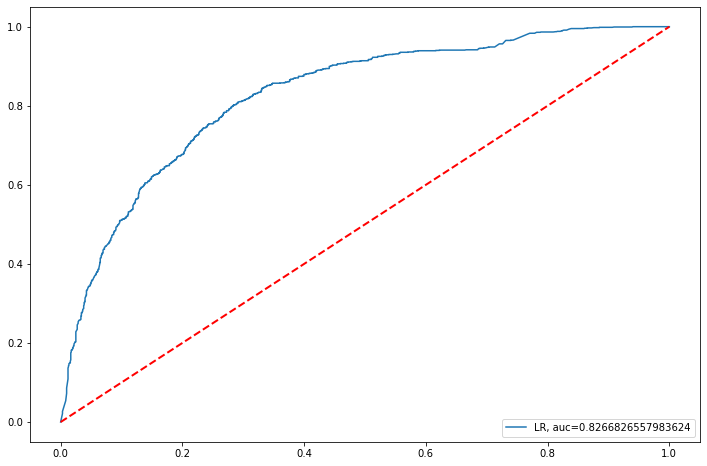

In [87]:
y_pred_proba = bnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

plt.rcParams['figure.figsize']=(12.,8.)
plt.plot(fpr, tpr, label="LR, auc="+str(auc))
plt.plot([0,1], [0,1], color='r', lw=2, linestyle='--')
plt.legend(loc=4)

# <font color='darkblue' style='font-size: 20;'>Analyzing the model results</font>
<hr style = 'border: 1px solid darkblue;'>

In [91]:
classifiers = [KNeighborsClassifier(metric='euclidean'),
               DecisionTreeClassifier(criterion='entropy', max_depth = 5, random_state=SEED),
               BNB(binarize = median_x_train)]

In [92]:
for clf in classifiers:
    clf.fit(X_train, Y_train)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    print('****Results****')
    y_pred = clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(Y_test, y_pred).round(4))
    print("Precision:",metrics.precision_score(Y_test, y_pred).round(4))
    print("Recall:",metrics.recall_score(Y_test, y_pred).round(4)) 
    print("F1:",metrics.f1_score(Y_test, y_pred).round(4))
    
    #cm = confusion_matrix(y_test, y_pred)
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    #disp.plot()

KNeighborsClassifier
****Results****
Accuracy: 0.8106
Precision: 0.7939
Recall: 0.8278
F1: 0.8105
DecisionTreeClassifier
****Results****
Accuracy: 0.8002
Precision: 0.787
Recall: 0.8112
F1: 0.7989
BernoulliNB
****Results****
Accuracy: 0.7534
Precision: 0.7093
Recall: 0.8404
F1: 0.7693


### Choosing the best model

Precision will measure how many positive values were correctly predicted as a whole in our model. Remembering that the true positives are the ones where Churn equals yes. 

It is this Churn that we need to pay attention to, it is the Churn that we have to reduce, it is the people who are leaving our company, we are losing profit, the company is losing with these customers leaving.

Thus, the KNN model is chosen, as it has better metrics.

# <font color='darkblue' style='font-size: 20;'>Improving the KNN Model</font>
<hr style = 'border: 1px solid darkblue;'>

### <font color='darkblue' style='font-size: 20;'>RandomSearchCV</font>

In [93]:
from sklearn.model_selection import RandomizedSearchCV

In [95]:
n_neighbors = np.arange(1,20,step=2)
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
metric = ['minkowski', 'euclidean']

In [96]:
param_grid = {
    "n_neighbors": n_neighbors,
    "weights": weights,
    "algorithm": algorithm,
    "metric": metric
}

In [97]:
knn = KNeighborsClassifier()

In [98]:
random_cv = RandomizedSearchCV(knn,
                              param_grid,
                              n_iter=5,
                              cv=3,
                              scoring='precision',
                              n_jobs=-1,
                              random_state=70)

In [100]:
%%time
rcv = random_cv.fit(X_norm, y)

Wall time: 8.04 s


In [101]:
rcv.best_params_

{'weights': 'distance',
 'n_neighbors': 11,
 'metric': 'minkowski',
 'algorithm': 'kd_tree'}

# <font color='darkblue' style='font-size: 20;'>Final Model</font>
<hr style = 'border: 1px solid darkblue;'>

In [102]:
#Creating the Random Forest model
knn_final = KNeighborsClassifier(**rcv.best_params_)

#Fitting the Random Forest model and making predictions of test set 
model = knn_final.fit(X_train, Y_train)
y_pred = knn_final.predict(X_test)

In [103]:
#Metrics
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred).round(4))
print("Precision:",metrics.precision_score(Y_test, y_pred).round(4))
print("Recall:",metrics.recall_score(Y_test, y_pred).round(4)) 
print("F1:",metrics.f1_score(Y_test, y_pred).round(4))

Accuracy: 0.8237
Precision: 0.8045
Recall: 0.8452
F1: 0.8243


### <font color='darkblue' style='font-size: 20;'>Confusion Matrix - Final RF Model</font>

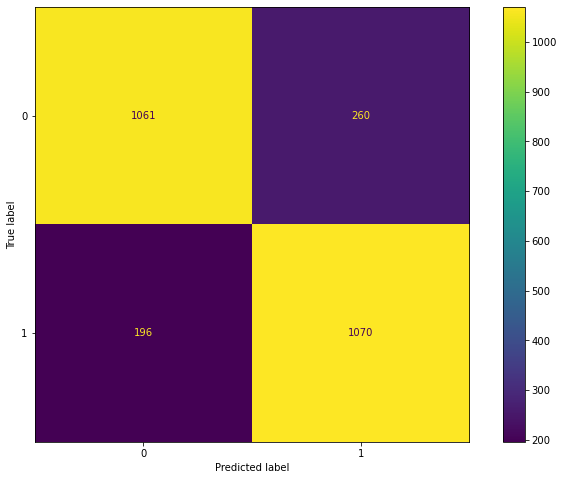

In [104]:
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()